In [ ]:
'''
Problem Statement
Data Analytics I
Create a Linear Regression Model using Python/R to predict home prices using Boston Housing 
Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains 
information about various houses in Boston through different parameters. There are 506 samples 
and 14 feature variables in this dataset. 
The objective is to predict the value of prices of the house using the given features.
'''

In [ ]:
'''
Boston Housing with Linear Regression
With this data our objective is create a model using linear regression to predict the houses price

The data contains the following columns:

CRIM: per capita crime rate by town.
ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS: proportion of non-retail business acres per town.
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
NOX: nitrogen oxides concentration (parts per 10 million).
RM: average number of rooms per dwelling.
AGE: proportion of owner-occupied units built prior to 1940.
DIS: weighted mean of distances to five Boston employment centres.
RAD: index of accessibility to radial highways.
TAX: full-value property-TAX rate per $10,000.
PTRATIO:pupil-teacher ratio by town
BLACK: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
LSTAT: lower status of the population (percent).
MEDV: median value of owner-occupied homes in $$1000s
'''

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Importing DataSet and take a look at Data
Boston = pd.read_csv("boston.csv")
Boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  BLACK    506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
Boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


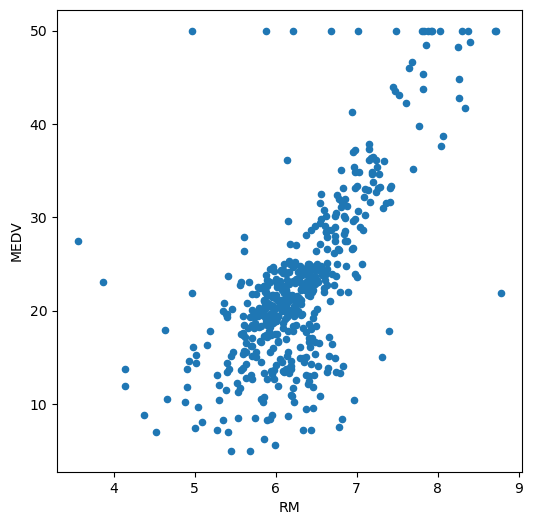

In [5]:
Boston.plot.scatter('RM', 'MEDV', figsize=(6, 6));

In [6]:
# In this plot its clearly to see a linear pattern. 
# Wheter more average number of rooms per dwelling, more expensive the median value is.

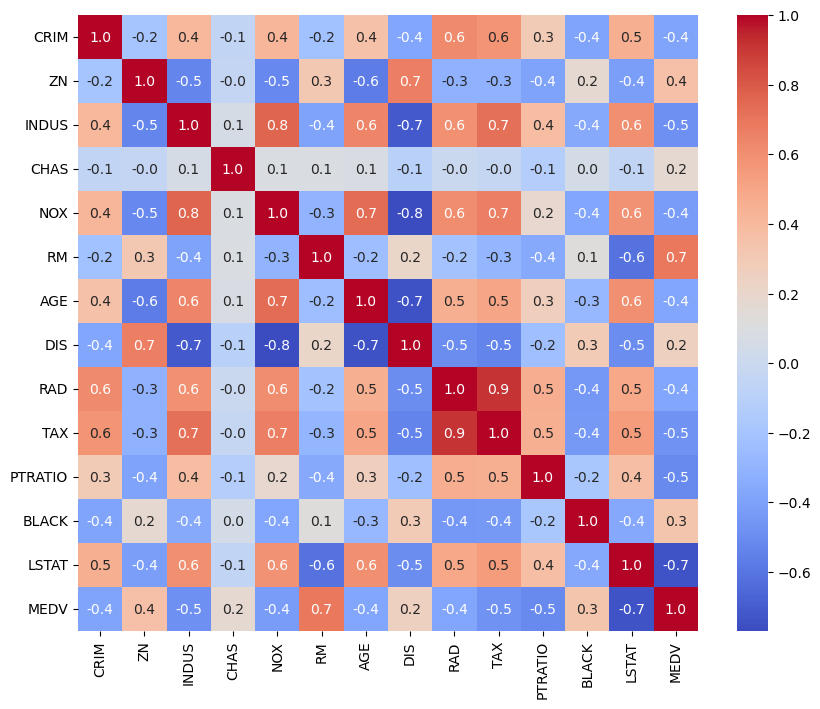

In [7]:
plt.subplots(figsize=(10,8))
sns.heatmap(Boston.corr(), cmap = 'coolwarm', annot = True, fmt = '.1f');

In [8]:
# At this heatmap plot, we can do our analysis better than the pairplot.

# Lets focus at the last line, where y = MEDV:
    
# When shades of Blue: the more Blue color is on X axis, smaller the MEDV. Negative correlation
# When light colors: those variables at axis x and y, they dont have any relation. Zero correlation
# When shades of Red : the more Red color is on X axis, higher the MEDV. Positive correlation

In [9]:
# Trainning Linear Regression Model
# Define X and Y

# X: Varibles named as predictors, independent variables, features.
# Y: Variable named as response or dependent variable

In [10]:
X = Boston[Boston.columns[:-1]]  # suggests that you are trying to access all but the last element of columns.
Y = Boston['MEDV']

In [11]:
# Import sklearn librarys:
# train_test_split, to split our data in two DF, one for build a model and other to validate.
# LinearRegression, to apply the linear regression.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [12]:
# Split DataSet
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
sc_X = StandardScaler()
X_train_ = sc_X.fit_transform(X_train)
X_test_ = sc_X.transform(X_test)

In [13]:
print(f'Train Dataset Size - X: {X_train.shape}, Y: {Y_train.shape}')
print(f'Test  Dataset Size - X: {X_test.shape}, Y: {Y_test.shape}')

Train Dataset Size - X: (354, 13), Y: (354,)
Test  Dataset Size - X: (152, 13), Y: (152,)


In [14]:
# Model Building
lm = LinearRegression()
lm.fit(X_train_, Y_train)
predictions = lm.predict(X_test_)

LinearRegression()

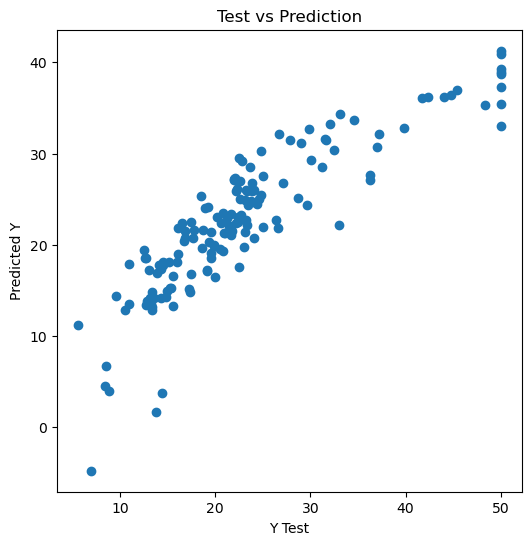

In [15]:
# Model Visualization
plt.figure(figsize=(6, 6));
plt.scatter(Y_test, predictions);
plt.xlabel('Y Test');
plt.ylabel('Predicted Y');
plt.title('Test vs Prediction');

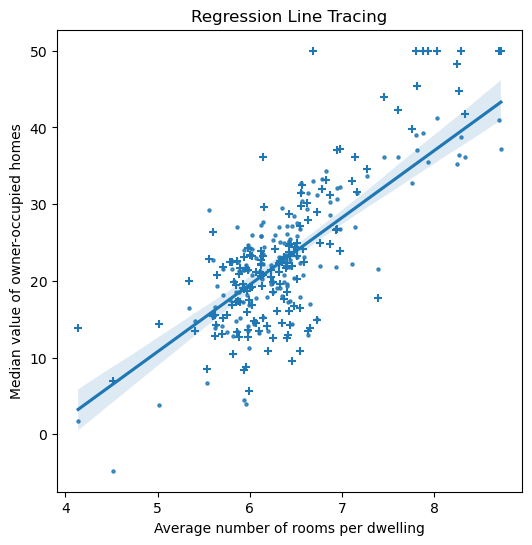

In [16]:
plt.figure(figsize=(6, 6));
sns.regplot(x = X_test['RM'], y = predictions, scatter_kws={'s':5});
plt.scatter(X_test['RM'], Y_test, marker = '+');
plt.xlabel('Average number of rooms per dwelling');
plt.ylabel('Median value of owner-occupied homes');
plt.title('Regression Line Tracing');

In [17]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, predictions))
print('Mean Square Error:', metrics.mean_squared_error(Y_test, predictions))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

Mean Absolute Error: 3.5929551567402753
Mean Square Error: 24.24476570563751
Root Mean Square Error: 4.923897410145495


In [18]:
# Model Coefficients
coefficients = pd.DataFrame(lm.coef_.round(2), X.columns)
coefficients.columns = ['Coefficients']
coefficients

,Coefficients
CRIM,-1.22
ZN,1.06
INDUS,-0.10
CHAS,0.64
NOX,-1.73
RM,1.89
AGE,-0.22
DIS,-3.14
RAD,2.67
TAX,-1.54


In [19]:
# How to interpret those coefficients: they are in function of MEDV, so

# for one unit that NOX increase, the house value decrease 'NOX'*1000 (Negative correlation) money unit.
# for one unit that RM increase, the house value increase 'RM'*1000 (Positive correlation) money unit.

# *1000 because the MEDV is in 1000 and this apply to the other variables/coefficients.